In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd

name = "results"
df = pd.read_csv(name + '.csv')
df = df[df['Time_ms'] > 0]
dir_name = 'a*_performance_plots'
os.makedirs(dir_name, exist_ok=True)


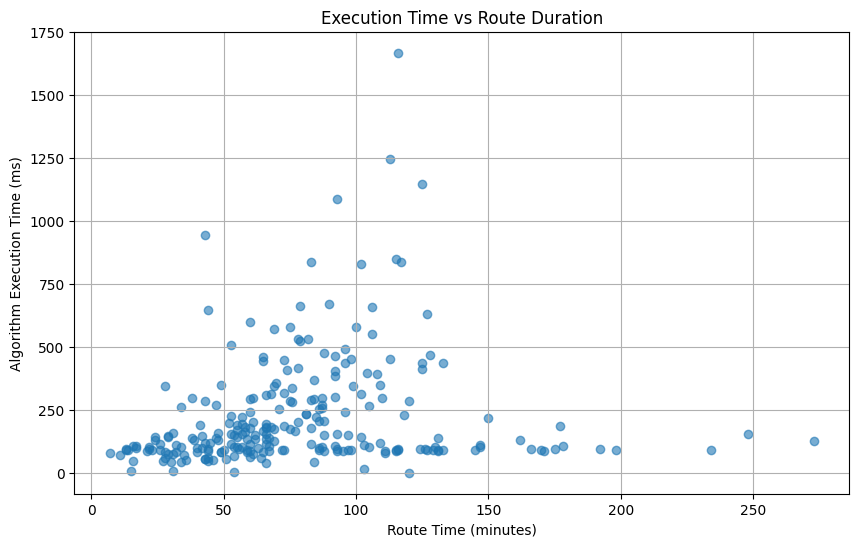

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Route_Time_minutes'], df['Time_ms'], alpha=0.6)
plt.title('Execution Time vs Route Duration')
plt.xlabel('Route Time (minutes)')
plt.ylabel('Algorithm Execution Time (ms)')
plt.grid(True)
plt.savefig(dir_name + '/Execution Time vs Route Duration' + name + '.png', dpi=600)
plt.show()

<Figure size 1000x600 with 0 Axes>

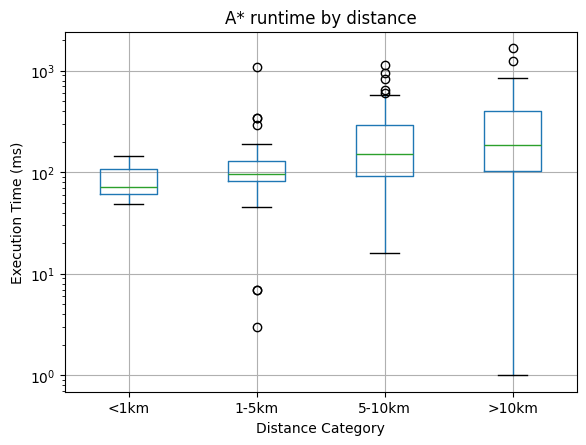

In [7]:
df['Distance_Category'] = pd.cut(df['Distance_meters'],
                                 bins=[0, 1000, 5000, 10000, float('inf')],
                                 labels=['<1km', '1-5km', '5-10km', '>10km'])

plt.figure(figsize=(10, 6))
df.boxplot(column='Time_ms', by='Distance_Category')
plt.title('A* runtime by distance')
plt.suptitle('')
plt.xlabel('Distance Category')
plt.ylabel('Execution Time (ms)')
plt.yscale('log')
plt.savefig(dir_name + '/Execution Time by Distance Category' + name + '.png', dpi=600)
plt.show()

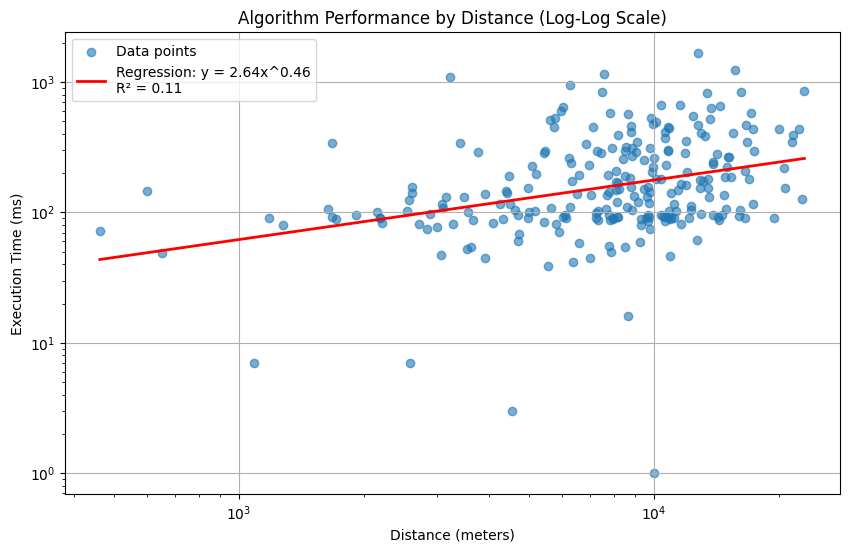

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))

x_log = np.log10(df['Distance_meters'].values.reshape(-1, 1))
y_log = np.log10(df['Time_ms'].values)

reg = LinearRegression().fit(x_log, y_log)

y_pred = reg.predict(x_log)

r2 = reg.score(x_log, y_log)

plt.scatter(df['Distance_meters'], df['Time_ms'], alpha=0.6, label='Data points')

x_vals = np.array([df['Distance_meters'].min(), df['Distance_meters'].max()])
y_vals = 10 ** (reg.predict(np.log10(x_vals).reshape(-1, 1)))
plt.plot(x_vals, y_vals, 'r-', linewidth=2,
         label=f'Regression: y = {10 ** reg.intercept_:.2f}x^{reg.coef_[0]:.2f}\nR² = {r2:.2f}')

plt.xscale('log')
plt.yscale('log')
plt.title('Algorithm Performance by Distance (Log-Log Scale)')
plt.xlabel('Distance (meters)')
plt.ylabel('Execution Time (ms)')
plt.grid(True)
plt.legend()
plt.savefig(dir_name + '/Algorithm Performance by Distance ' + name + '.png', dpi=600)

plt.show()

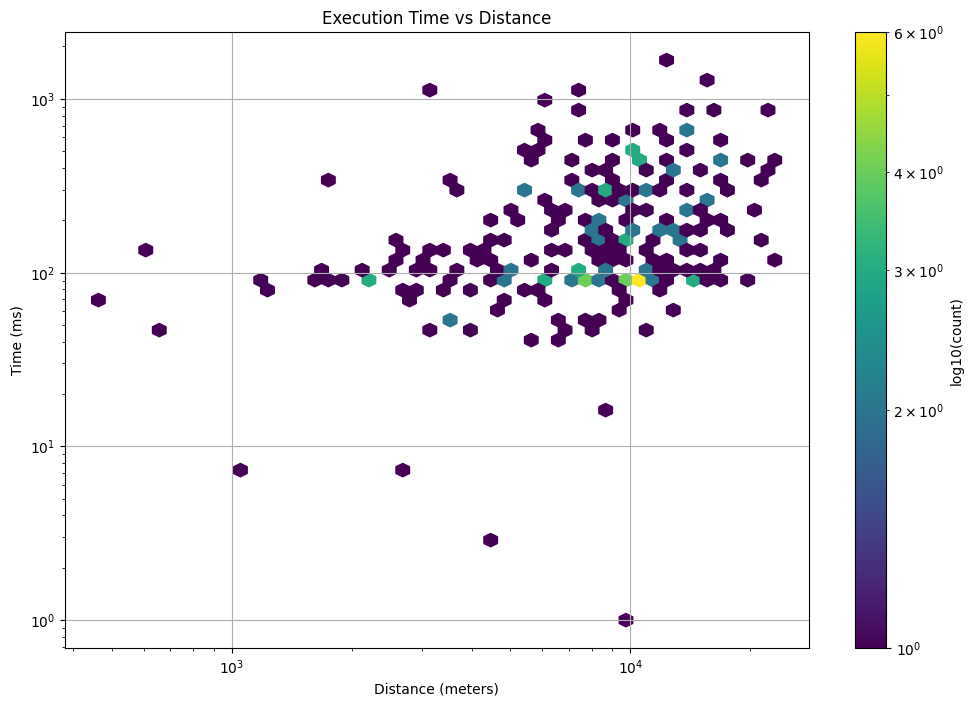

In [6]:
plt.figure(figsize=(12, 8))
hb = plt.hexbin(df['Distance_meters'], df['Time_ms'],
                gridsize=50, bins='log', cmap='viridis',
                xscale='log', yscale='log')
plt.title('Execution Time vs Distance')
plt.xlabel('Distance (meters)')
plt.ylabel('Time (ms)')
cb = plt.colorbar(hb)
cb.set_label('log10(count)')
plt.grid(True)
plt.savefig(dir_name + '/Execution Time vs Distance' + name + '.png', dpi=600)
plt.show()